# Clase 2. Nuestro primer árbol de decisión

## Un poco de lectura

### ¿Qué es un árbol de decisión?
https://www.ibm.com/es-es/topics/decision-trees

### ¿Qué es la matriz de confusión y las métricas asociadas?
https://profesordata.com/2020/08/07/evaluando-los-modelos-de-clasificacion-en-aprendizaje-automatico-la-matriz-de-confusion-claramente-explicada/

### ¿Qué es MLFflow?
https://anderfernandez.com/blog/tutorial-mlflow-completo/#:~:text=MLflow%20es%20una%20herramienta%20de,tal%20forma%20que%20sea%20reproducible.

## Importamos paquetes necesarios

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  

## Cargamos nuestros datasets

![image info](../img/Datasets.png)

In [23]:
directorio_data = '../data/'

x_training_file = directorio_data + 'x_traininig.csv'
y_training_file = directorio_data + 'y_traininig.csv'

x_testing_file = directorio_data + 'x_testing.csv'
y_testing_file = directorio_data + 'y_testing.csv'

In [24]:
df_x_training_validacion = pd.read_csv(x_training_file)
df_y_training_validacion = pd.read_csv(y_training_file)

X_testing = pd.read_csv(x_testing_file)
Y_testing = pd.read_csv(y_testing_file)

In [25]:
df_x_training_validacion.head()

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,7377,3.250000,3.000,3.000000,3.250000,3.250000,5.2
1,21753,4.150000,4.175,4.400000,4.125000,4.125000,4.2
2,5330,4.000000,4.000,4.000000,4.000000,4.500000,8.0
3,67188,4.125000,3.875,3.750000,4.125000,4.000000,6.0
4,16542,4.208333,3.750,4.333333,4.083333,4.083333,6.7


In [26]:
df_y_training_validacion.head()

,POPULAR
0,NO
1,NO
2,NO
3,NO
4,NO


### Separamos nuestro dataset training-validación en training y validación

In [27]:
random_state = 661
test_size = 0.3

X_training, X_validacion, Y_training, Y_validacion = train_test_split(
    df_x_training_validacion, 
    df_y_training_validacion, 
    test_size=test_size, 
    random_state=random_state
)

In [28]:
pd.concat([X_training, Y_training], axis="columns").head()

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,POPULAR
9893,13661,3.333333,3.500000,3.500000,3.166667,3.833333,4.90,NO
16841,40990,3.613636,3.409091,3.727273,3.409091,3.636364,6.00,NO
20718,56751,3.875000,3.375000,3.500000,3.750000,3.875000,6.80,NO
1938,37427,3.250000,1.750000,2.250000,1.750000,1.750000,6.00,NO
7717,60966,4.029412,4.044118,4.000000,4.073529,4.014706,9.91,NO


In [29]:
pd.concat([X_validacion, Y_validacion], axis="columns").head()

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,POPULAR
3085,74394,3.000000,3.500000,3.500000,2.500000,2.5,5.6,NO
20489,55145,4.000000,3.500000,3.250000,3.500000,3.5,7.5,NO
34106,48129,3.833333,3.333333,3.500000,3.666667,3.5,9.0,NO
21666,47150,3.666667,3.833333,3.666667,3.666667,4.0,8.9,NO
3840,70905,4.000000,3.500000,3.500000,4.000000,4.0,5.4,NO


In [30]:
pd.concat([X_testing, Y_testing], axis="columns").head()

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,POPULAR
0,10364,3.751534,3.030675,3.257669,3.266871,3.401840,4.6,NO
1,18518,3.818182,3.727273,3.545455,3.681818,3.818182,7.0,NO
2,16278,3.071429,2.928571,3.500000,3.214286,3.142857,4.0,NO
3,11087,2.625000,2.750000,3.250000,3.375000,2.750000,5.0,NO
4,17042,4.000000,3.500000,3.000000,4.000000,4.000000,4.8,NO


### Dejamos solo las columnas que queremos

In [31]:
columnas = [
    "review_overall",
    "review_aroma",
    "review_appearance",
    "review_palate",
    "review_taste",
    "beer_abv"
]

In [32]:
X_training = X_training[columnas]
X_validacion = X_validacion[columnas]
X_testing = X_testing[columnas]

In [33]:
(len(X_training) - 1 ) * (len(X_training.columns))

164634

### Nuestro primer modelo

In [34]:
import time
print(time.time())
max_depth = 4
criterion='gini'
clf = DecisionTreeClassifier(
            criterion = criterion,
            max_depth=max_depth,
            random_state=random_state
        )
_ = clf.fit(X_training, Y_training)

print(time.time())

1691593780.1692667
1691593780.2402964


### Entendiendo lo que nos cuenta

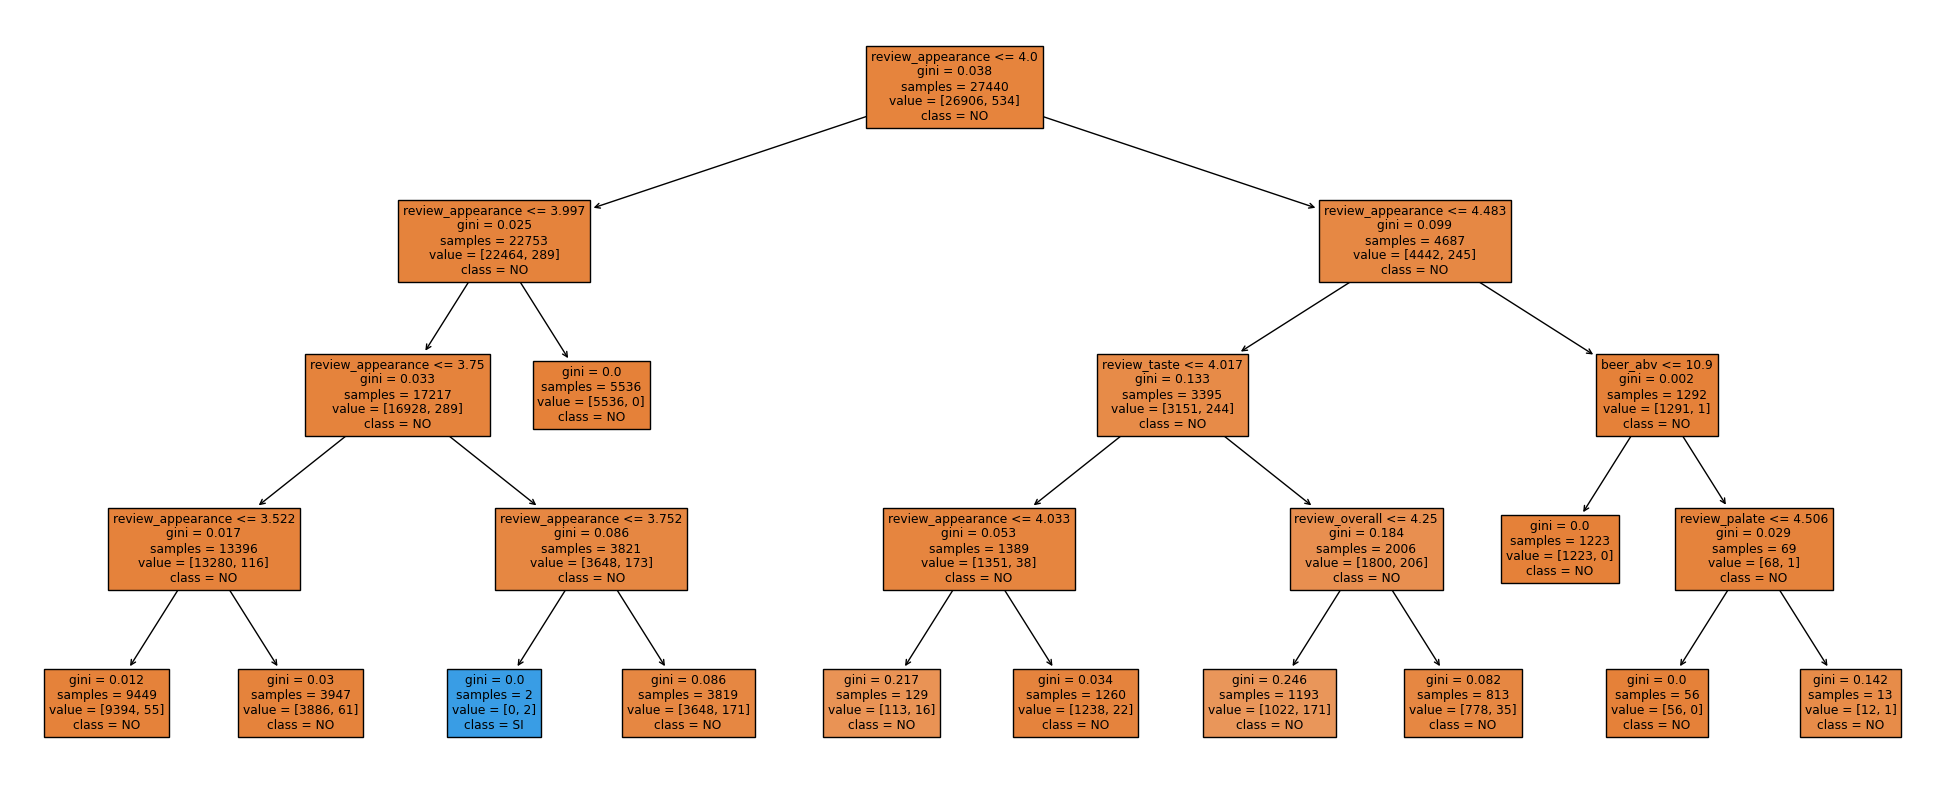

In [26]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X_training.columns,  
                   class_names=Y_training['POPULAR'].unique(),
                   filled=True)

### Analizamos los resultados con el dataset de validacion

#### Matriz de confusión

In [27]:
Y_validacion_pred = clf.predict(X_validacion)

df_matriz_confusion = Y_validacion.copy()
df_matriz_confusion.columns = ['real']
df_matriz_confusion['prediccion'] = Y_validacion_pred

df_matriz_confusion.groupby(by=['real', 'prediccion']).size().reset_index(name='counts')

,real,prediccion,counts
0,NO,NO,11496
1,SI,NO,264


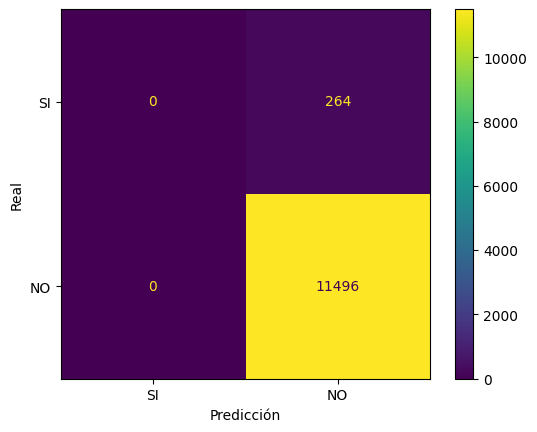

In [28]:
cm = confusion_matrix(Y_validacion, Y_validacion_pred, labels=['SI', 'NO'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SI', 'NO'])
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Calculando métricas

In [29]:
true_positives = cm[0,0]
true_negatives = cm[1,1]
false_positives = cm[1, 0]
false_negatives = cm[0,1]

[true_positives, false_positives, true_negatives, false_negatives]

[0, 0, 11496, 264]

#### Accuracy
(tp + tn) / (tp + tn + fp + fn)

Es el porcentaje total de elementos clasificados correctamente.

In [30]:
accuracy = (true_positives+true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
accuracy

0.9775510204081632

#### Recall 
(tp ) / (tp + fn)

Es el número de elementos identificados correctamente como positivos del total de positivos verdaderos.

In [31]:
recall = (true_positives) / (true_positives + false_negatives)
recall

0.0

#### Precision 
(tp ) / (tp + fp)

Es el número de elementos identificados correctamente como positivos de un total de elementos identificados como positivos.


In [32]:
precision = (true_positives) / (true_positives + false_positives)
precision

C:\Users\arouiller\AppData\Local\Temp\ipykernel_49916\1204905090.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = (true_positives) / (true_positives + false_positives)


nan

#### Especificidad
(tn ) / (tn + fp)

Es el número de ítems correctamente identificados como negativos  de un total de elementos identificados como negativos.

In [33]:
specificity = (true_negatives) / (true_negatives + false_positives)
specificity

1.0

#### Tasa de falso positivo (error tipo 1)
(fp)/(fp + tn)

Número de elementos identificados erróneamente como positivos de total negativos verdaderos- FP / ( FP + TN)

In [34]:
tasa_falso_positivo = (false_positives) / (true_negatives + false_positives)
tasa_falso_positivo

0.0

#### Tasa de falso negativo (error tipo 2)
(fn)/(fn + tp)

Número de elementos identificados erróneamente como negativos del total de verdaderos positivos

In [35]:
tasa_falso_negativo = (false_negatives) / (true_negatives + false_positives)
tasa_falso_negativo

0.022964509394572025

#### F1
2 * (precision * recall) / (precision + recall)

Es la media armónica de la precicisión y el recall

In [36]:
f1 = 2 * (precision*recall)/(precision+recall)
f1

nan

#### Una Metrica del negocio

$4000 por cada verdadero positivo

-$200 por cada falso positivo

dividido por el total de positivos (true_positives + false_negatives)

In [37]:
metrica_negocio_optima = (4000*(true_positives+false_negatives)) /(true_positives + false_negatives)
metrica_negocio_optima

4000.0

In [38]:
metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)
metrica_negocio

0.0

### Probemos con el dataset de testing

In [39]:
y_testing_pred = clf.predict(X_testing)

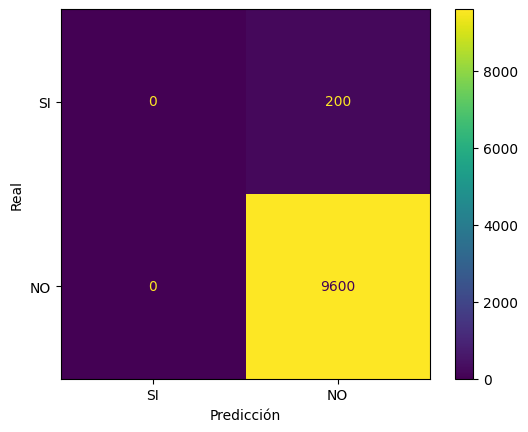

In [40]:
cm = confusion_matrix(Y_testing, y_testing_pred, labels=['SI', 'NO'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SI', 'NO'])
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [41]:
true_positives = cm[0,0]
true_negatives = cm[1,1]
false_positives = cm[1, 0]
false_negatives = cm[0,1]

[true_positives, false_positives, true_negatives, false_negatives]

[0, 0, 9600, 200]

In [42]:
metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)
metrica_negocio

0.0